<a href="https://colab.research.google.com/github/Akshata1992/TensorFlow/blob/master/TF2_0_WebAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf

In [20]:
#import requests library to get ip address of the URL
import requests

r = requests.get('https://api.ipify.org?format=json')
j = r.json()
print(j)

{'ip': '104.155.201.180'}


In [21]:
#import all other necessary libraries

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

print("Libraries loaded successfully")

Libraries loaded successfully


In [22]:
#Load into the dataset
mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print("Shape of x train: ",x_train.shape)
print("Shape of y_train: ", y_train.shape)

Shape of x train:  (60000, 28, 28)
Shape of y_train:  (60000,)


In [23]:
#as input is 2D!, change the dim to N x D x C to feed it to convolution
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print("Shape of x train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)

Shape of x train:  (60000, 28, 28, 1)
Shape of x_test:  (10000, 28, 28, 1)


In [24]:
#create our model

i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides = 2,activation='relu')(i)
x = Conv2D(64,(3,3),strides = 2,activation='relu')(x)
x = Conv2D(128,(3,3),strides = 2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)

In [27]:
#compile and train the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1635 - accuracy: 0.9376 - val_loss: 0.3311 - val_accuracy: 0.8988
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1514 - accuracy: 0.9418 - val_loss: 0.3498 - val_accuracy: 0.8977
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1460 - accuracy: 0.9441 - val_loss: 0.3166 - val_accuracy: 0.9025
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1379 - accuracy: 0.9475 - val_loss: 0.3447 - val_accuracy: 0.8991
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1300 - accuracy: 0.9494 - val_loss: 0.3510 - val_accuracy: 0.8960
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1232 - accuracy: 0.9537 - val_loss: 0.3615 - val_accuracy: 0.9003
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1186 - accuracy: 0.9547 - val_loss: 0.3539 - val_accur

In [31]:
#create temporary directory to save the model
import tempfile,os

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR,str(version))
print(export_path)

#check folder already exists
if os.path.isdir(export_path):
  print("Dir already exists!")
  !rm -r {export_path}

tf.saved_model.save(model,export_path)

print('\nSaved model:')
!ls -l

/tmp/1
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/1/assets

Saved model:
total 4
drwxr-xr-x 1 root root 4096 Jul 30 16:30 sample_data


In [32]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_3'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_input_3:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_5'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0820 14:26:22.348167 139690788169600 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/re

In [33]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  12061      0 --:--:-- --:--:-- --:--:-- 12061
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:2 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1

In [35]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 60 not upgraded.
Need to get 210 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.3.0 [210 MB]
Fetched 210 MB in 5s (38.9 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.3.0_all.deb ...
Unpacking tensorflow-model-server (2.3.0) ...
Setting up tensorflow-model-server (2.3.0) ...


In [39]:
os.environ["MODEL_DIR"] = MODEL_DIR 

In [41]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [42]:
!tail server.log

To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-08-20 14:41:51.630042: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:199] Restoring SavedModel bundle.
2020-08-20 14:41:51.675390: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /tmp/1
2020-08-20 14:41:51.683190: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 75560 microseconds.
2020-08-20 14:41:51.684517: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2020-08-20 14:41:51.684632: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2020-08-20 14:41:51.685858: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 ...
[wa

In [44]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

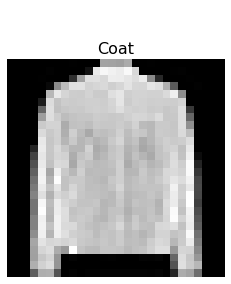

In [45]:
def show(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

i = np.random.randint(0, len(x_test))
show(i, labels[y_test[i]])

In [50]:
#Format some data to pass to the server
import json
data = json.dumps({'signature':'serving_default','instances':x_test[3:7].tolist()})
print(data)

{"signature": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.08235294117647059], [0.4823529411764706], [0.4235294117647059], [0.38823529411764707], [0.38823529411764707], [0.32941176470588235], [0.3254901960784314], [0.33725490196078434], [0.3607843137254902], [0.27450980392156865], [0.023529411764705882], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.41568627450980394], [0.9725490196078431], [0.9019607843137255], [0.803921568627451], [0.9372549019607843], [0.8313725490196079], [0.6823529411764706], [0.8431372549019608], [0.8117647058823529], [0.5450980392156862], [0.36470588235294116], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.4980392156862745], [0.8470588235294118], [0.8352941176470589], [0.803921568627451], [0.8392156862745098], [0.8392156862745098], [0.7568627450980392], 

In [51]:
headers = {"content_type":"application/json"}
r = requests.post("http://localhost:8501/v1/models/fashion_model:predict",data=data,headers=headers)
j = r.json()
print(j.keys())
print(j)

dict_keys(['predictions'])
{'predictions': [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.61613207e-36, 0.0], [4.09465656e-06, 4.10929e-12, 4.06731537e-08, 8.08386691e-09, 9.13791212e-07, 4.35466848e-13, 0.999995, 4.92370405e-16, 5.83022508e-13, 2.77612216e-13], [2.23716076e-35, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.47242592e-23, 0.0], [1.18287862e-20, 8.776712e-19, 5.51038362e-08, 9.61322321e-19, 1.0, 9.13271666e-25, 6.87377932e-10, 6.0305508e-27, 2.53544403e-18, 1.71619918e-29]]}


In [56]:
#It looks like 2D array,lets check
pred = np.array(j['predictions'])
pred.shape

#it is in the form of N x K.
#pred[n,k] --> nth sample belonging kth class

(4, 10)

In [57]:
#Get the highest predicted class
pred = pred.argmax(axis=1)

In [59]:
pred = [labels[i] for i in pred]
print(pred)

['Trouser', 'Shirt', 'Trouser', 'Coat']


In [61]:
#Get the actual values
actual = [labels[i] for i in y_test[3:7]]
print(actual)

['Trouser', 'Shirt', 'Trouser', 'Coat']


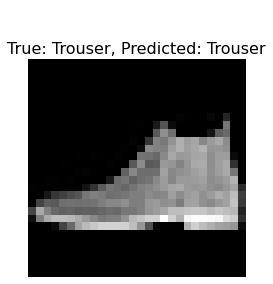

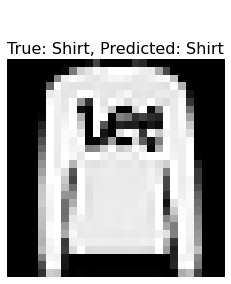

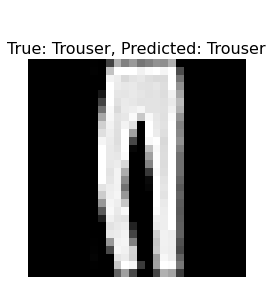

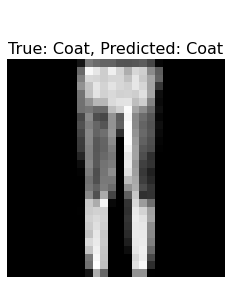

In [64]:
for i in range(0,4):
  show(i,f"True: {actual[i]}, Predicted: {pred[i]}")

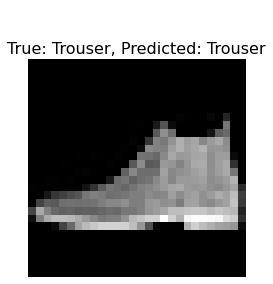

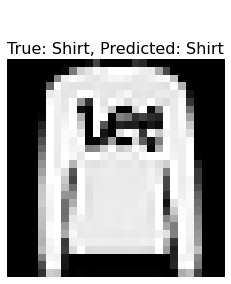

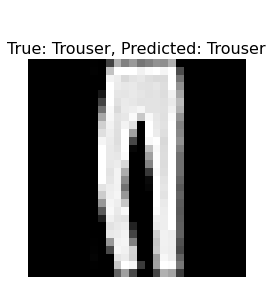

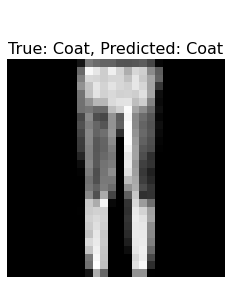

In [66]:
headers = {"content_type":"application/json"}
r = requests.post("http://localhost:8501/v1/models/fashion_model:predict",data=data,headers=headers)
j = r.json()
pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]
for i in range(0,4):
  show(i, f"True: {actual[i]}, Predicted: {pred[i]}")